In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from IPython.display import Image  
from io import StringIO
from sklearn.metrics import mean_squared_error, r2_score
import time
import urllib.request
import json
from scipy.optimize import curve_fit
import datetime

In [2]:
df1 = pd.read_csv('SEMS_ALL.csv')

In [3]:
df1.head()

,Unnamed: 0,DateTime,Outdoor_Temperature,DH_Home1,DH_Home2,DH_Home3,DH_Home4,DH_Home5,DH_Home6,DH_Home7,...,DH_Home91,DH_Home92,DH_Home93,DH_Home94,DH_Home95,DH_Heating_Rate,month,Day,Hour,Minute
0,0,01/01 00:15:00,7.2725,2.02,3.01,3.06,2.87,1.89,2.43,2.51,...,2.53,4.17,4.94,3.53,3.57,556.01,1,1,0,1
1,1,01/01 00:30:00,6.0650,2.23,2.98,3.03,3.16,2.08,2.68,2.49,...,2.79,2.74,2.40,1.78,2.47,526.69,1,1,0,1
2,2,01/01 00:45:00,4.8575,2.33,2.63,2.67,3.30,2.18,2.63,2.30,...,2.92,2.71,2.54,1.93,2.35,406.05,1,1,0,1
3,3,01/01 01:00:00,3.6500,2.36,2.49,2.53,2.95,2.20,2.29,2.09,...,2.95,3.40,2.87,2.13,2.45,307.21,1,1,1,1
4,4,01/01 01:15:00,3.8375,2.10,2.08,2.12,1.99,1.34,1.70,2.10,...,1.76,2.09,2.41,1.80,2.45,249.99,1,1,1,1


In [4]:
df1_l = df1[(df1['Outdoor_Temperature'] <= -5)]
df1_l.head()

,Unnamed: 0,DateTime,Outdoor_Temperature,DH_Home1,DH_Home2,DH_Home3,DH_Home4,DH_Home5,DH_Home6,DH_Home7,...,DH_Home91,DH_Home92,DH_Home93,DH_Home94,DH_Home95,DH_Heating_Rate,month,Day,Hour,Minute
37438,37438,01/25 23:45:00,-5.0400,2.41,3.14,2.57,3.38,2.23,2.55,2.12,...,3.00,3.45,3.32,2.95,3.72,311.70,1,25,23,1
37439,37439,01/25 24:00:00,-5.5900,2.41,2.86,3.62,2.99,2.23,2.87,2.96,...,3.00,4.95,4.03,2.95,3.38,314.87,1,25,24,1
37440,37440,01/26 00:15:00,-6.1375,2.42,3.14,2.57,3.38,2.24,2.87,2.12,...,3.00,3.44,4.03,2.95,3.72,319.10,1,26,0,1
37441,37441,01/26 00:30:00,-6.6850,2.42,2.52,3.19,3.38,2.24,2.54,2.96,...,3.01,4.32,4.02,2.95,3.72,324.01,1,26,0,1
37442,37442,01/26 00:45:00,-7.2325,2.43,3.56,3.19,3.38,2.24,2.87,2.62,...,3.01,4.33,4.02,2.95,4.23,329.52,1,26,0,1


In [5]:
#df1_l = df1_l[(df1_l['DH_Heating_Rate'] <= 300)]

df1_l.Outdoor_Temperature = df1_l['Outdoor_Temperature'].round(2)
X = df1_l[['Outdoor_Temperature','Hour','month','Day']]
y = df1_l['DH_Heating_Rate'].round(2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model = LinearRegression().fit(X_train, y_train)
print(model.score(X_train,y_train))
predict = model.predict(X_test)
#plt.scatter(X_test['Outdoor_Temperature'],y_test)
#plt.plot(X_test['Outdoor_Temperature'],predict,'r')
#plt.show()
#plt.scatter(X_test['Hour'],y_test)
#plt.plot(X_test['Hour'],predict,'r')
#plt.show()

0.5249191113382166


/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Text(0.5, 1.0, 'Axis [1,1]')

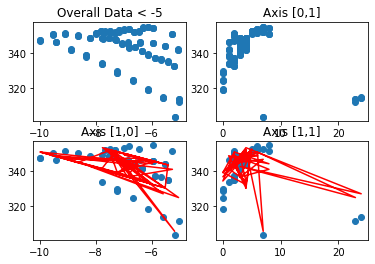

In [6]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].scatter(X['Outdoor_Temperature'], y)
axs[0, 0].set_title('Overall Data < -5')
axs[0, 1].scatter(X['Hour'], y)
axs[0, 1].set_title('Axis [0,1]')
axs[1, 0].scatter(X_test['Outdoor_Temperature'],y_test)
axs[1, 0].plot(X_test['Outdoor_Temperature'],predict,'r')
axs[1, 0].set_title('Axis [1,0]')
axs[1, 1].scatter(X_test['Hour'],y_test)
axs[1, 1].plot(X_test['Hour'],predict,'r')
axs[1, 1].set_title('Axis [1,1]')

In [7]:
df1_l = df1[(df1['Outdoor_Temperature'] > -5) & (df1['Outdoor_Temperature'] <= 0)]
df1_l.Outdoor_Temperature = df1_l['Outdoor_Temperature'].round(2)
X = df1_l[['Outdoor_Temperature','Hour','month','Day']]
y = df1_l['DH_Heating_Rate'].round(2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model = LinearRegression().fit(X_train, y_train)
print(model.score(X_train,y_train))
predict = model.predict(X_test)
#plt.scatter(X_test['Outdoor_Temperature'],y_test)
#plt.plot(X_test['Outdoor_Temperature'],predict,'r')
#plt.show()

0.18520810997340265


/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Text(0.5, 1.0, 'Axis [1,1]')

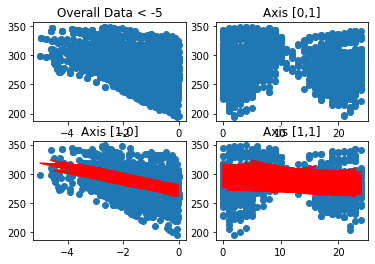

In [8]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].scatter(X['Outdoor_Temperature'], y)
axs[0, 0].set_title('Overall Data < -5')
axs[0, 1].scatter(X['Hour'], y)
axs[0, 1].set_title('Axis [0,1]')
axs[1, 0].scatter(X_test['Outdoor_Temperature'],y_test)
axs[1, 0].plot(X_test['Outdoor_Temperature'],predict,'r')
axs[1, 0].set_title('Axis [1,0]')
axs[1, 1].scatter(X_test['Hour'],y_test)
axs[1, 1].plot(X_test['Hour'],predict,'r')
axs[1, 1].set_title('Axis [1,1]')

In [9]:
df1_l = df1[(df1['Outdoor_Temperature'] > 0) & (df1['Outdoor_Temperature'] <= 5)]
df1_l.Outdoor_Temperature = df1_l['Outdoor_Temperature'].round(2)
X = df1_l[['Outdoor_Temperature','Hour','month','Day']]
y = df1_l['DH_Heating_Rate'].round(2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model = LinearRegression().fit(X_train, y_train)
print(model.score(X_train,y_train))
predict = model.predict(X_test)
#plt.scatter(X_test['Outdoor_Temperature'],y_test)
#plt.plot(X_test['Outdoor_Temperature'],predict,'r')
#plt.show()

0.3176491254669024


/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Text(0.5, 1.0, 'Axis [1,1]')

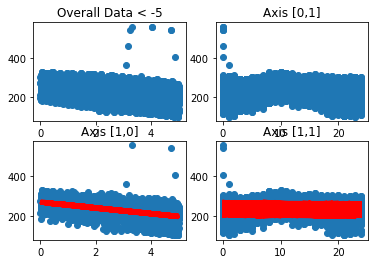

In [10]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].scatter(X['Outdoor_Temperature'], y)
axs[0, 0].set_title('Overall Data < -5')
axs[0, 1].scatter(X['Hour'], y)
axs[0, 1].set_title('Axis [0,1]')
axs[1, 0].scatter(X_test['Outdoor_Temperature'],y_test)
axs[1, 0].plot(X_test['Outdoor_Temperature'],predict,'r')
axs[1, 0].set_title('Axis [1,0]')
axs[1, 1].scatter(X_test['Hour'],y_test)
axs[1, 1].plot(X_test['Hour'],predict,'r')
axs[1, 1].set_title('Axis [1,1]')

In [11]:
df1_l = df1[(df1['Outdoor_Temperature'] > 5) & (df1['Outdoor_Temperature'] <= 10)]
df1_l.Outdoor_Temperature = df1_l['Outdoor_Temperature'].round(2)
X = df1_l[['Outdoor_Temperature','Hour','month','Day']]
y = df1_l['DH_Heating_Rate'].round(2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model = LinearRegression().fit(X_train, y_train)
print(model.score(X_train,y_train))
predict = model.predict(X_test)
#plt.scatter(X_test['Outdoor_Temperature'],y_test)
#plt.plot(X_test['Outdoor_Temperature'],predict,'r')
#plt.show()

0.2334396687882745


/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Text(0.5, 1.0, 'Axis [1,1]')

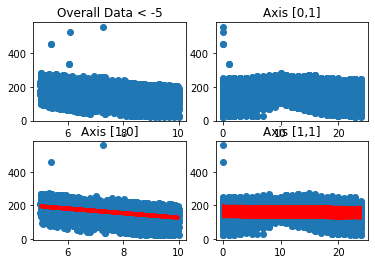

In [12]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].scatter(X['Outdoor_Temperature'], y)
axs[0, 0].set_title('Overall Data < -5')
axs[0, 1].scatter(X['Hour'], y)
axs[0, 1].set_title('Axis [0,1]')
axs[1, 0].scatter(X_test['Outdoor_Temperature'],y_test)
axs[1, 0].plot(X_test['Outdoor_Temperature'],predict,'r')
axs[1, 0].set_title('Axis [1,0]')
axs[1, 1].scatter(X_test['Hour'],y_test)
axs[1, 1].plot(X_test['Hour'],predict,'r')
axs[1, 1].set_title('Axis [1,1]')

0.8286806845453272


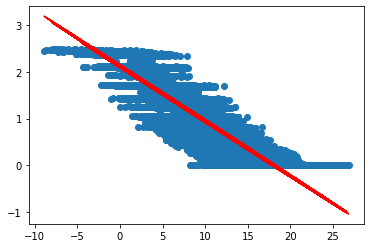

0.8259164359086333


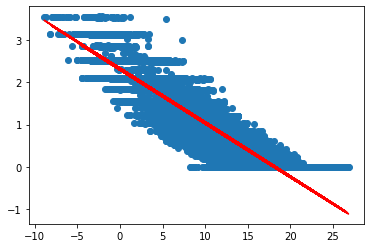

0.8273974408447412


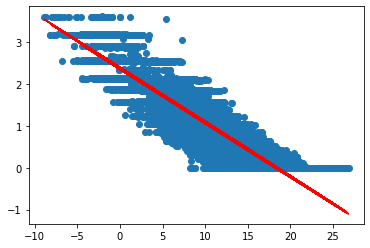

0.8216423576314599


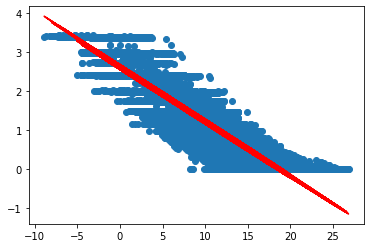

0.8637712924411958


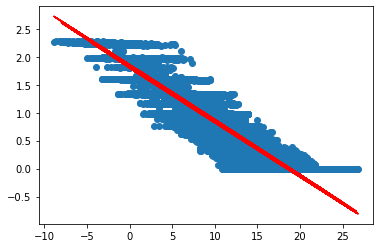

0.8479797578106936


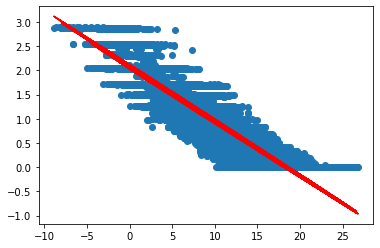

0.8525778795785421


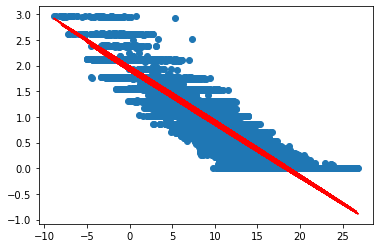

0.8350850612424667


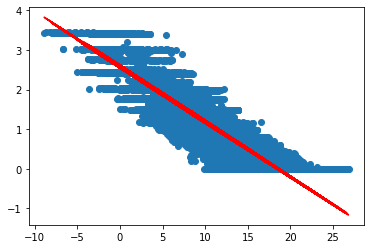

0.818993425248465


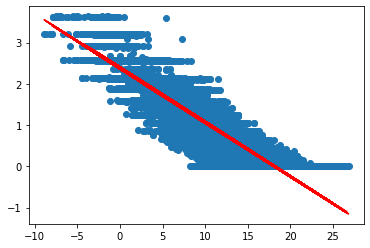

0.813284772843008


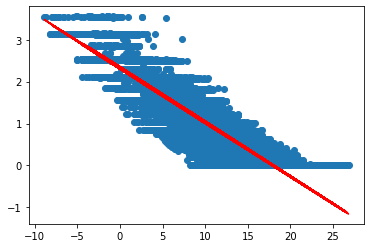

0.8118268425743416


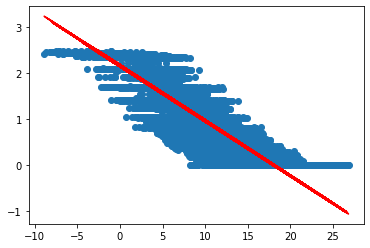

0.8189908623055338


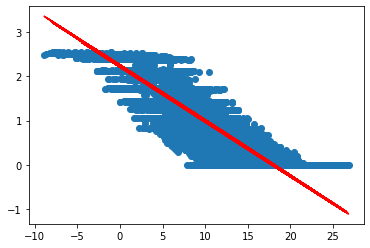

0.8235461220154099


In [ ]:
for i in df1.columns:
    if (i == 'Unnamed: 0' or i == 'DateTime' or i == 'Outdoor_Temperature' or i == 'Hour' or i == 'month' or i == 'Day' or i == 'Minute'):
        i
    else:
            X = df1[['Outdoor_Temperature','Hour','month','Day']]
            y = df1[i].round(2)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
            model = LinearRegression().fit(X_train, y_train)
            print(model.score(X_train,y_train))
            predict = model.predict(X_test)
            plt.scatter(X_test['Outdoor_Temperature'],y_test)
            plt.plot(X_test['Outdoor_Temperature'],predict,'r')
            plt.show()
        

In [ ]:
f = urllib.request.urlopen('http://dataservice.accuweather.com/currentconditions'+
                           '/v1/330088/historical/24?apikey=cJO52cgVK2bIz3A4dPK0rfjQEBuqGVk3')
                           
response = json.loads(f.read())
weatherforecast = pd.DataFrame(columns=['Temp','Hour','month','Day'])
for i in range(24):
    temp=response[i]['Temperature']['Metric']['Value']
    Dt = datetime.datetime.strptime(response[i]['LocalObservationDateTime'], '%Y-%m-%dT%H:%M:%S+01:00')
    weatherforecast = weatherforecast.append({'Temp':temp,'Hour':Dt.hour,'month': Dt.month,'Day': Dt.day}, 
                                             ignore_index=True)
#weatherforecast = weatherforecast.sort_values(by=['Hour'])

In [ ]:
weatherforecast = weatherforecast.sort_values(by=['Hour'])

In [ ]:

plt.scatter(weatherforecast['Hour'],model.predict(weatherforecast))
plt.xticks(np.arange(0, 23, step=1))


In [ ]:
for i in df1.columns:
    if (i == 'DateTime' or i == 'Outdoor_Temperature' or i == 'Hour' or i == 'month' or i == 'Day' or i == 'Minute'):
        i
    else:
        forecast_DH = np.array([])
        X = df1[['Outdoor_Temperature','Hour','month','Day']]
        y = df1[i].round(2)
        model = LinearRegression().fit(X, y)
        print(model.score(X,y))
        for i in range(len(weatherforecast)):
            if ((weatherforecast.iloc[i,0] > 15) or (weatherforecast.iloc[i,3] >= 0 and 
                                                         weatherforecast.iloc[i,3] < 6) ):
                forecast_DH = np.append(forecast_DH,20).round(2)
            else:
                x =  pd.DataFrame((weatherforecast.iloc[i,0],weatherforecast.iloc[i,1],
                           weatherforecast.iloc[i,2],weatherforecast.iloc[i,3]))
                forecast_DH = np.append(forecast_DH,model.predict(x.T))
        plt.plot(weatherforecast.Hour,forecast_DH,'r')
        plt.show()

In [ ]:
d = {'Temp': [22, 21,20,19,18,17,17,18,21,24,27,29,31,33,34,34,35,35,34,32,31,30,28,27], 
     'Hour': [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], 
     'month': [8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8], 
     'Day':[7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7]}
df3 = pd.DataFrame(data=d)

In [ ]:
d = {'Temp': [-10,
              -10,
              -10,
              -10,
              -9.4,
              -9.4,
              -5.6,
              -5.6,
              -5.6,
              -5.6,
              -4,
              -4.,
              -3,
              -2.5,
              -2.5,
              -2.7,
              -2.5,
              -6.7,
              -5.6,
              -5.6,
              -5.6,
              -5.6,
              -2.5,
             -2.5], 
     'Hour': [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], 
     'month': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1], 
     'Day':[8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8]}
df4 = pd.DataFrame(data=d)

In [ ]:
forecast_DH = np.array([])
X = df1[['Outdoor_Temperature','Hour','month','Day']]
y = df1.DH_Heating_Rate.round(2)
model = LinearRegression().fit(X, y)
print(model.score(X,y))
for i in range(len(df3)):
    if ((df3.iloc[i,0] > 15) or (df3.iloc[i,3] >= 0 and df3.iloc[i,3] < 6) or (df3.iloc[i,3] == 23)):
        forecast_DH = np.append(forecast_DH,20).round(2)
    else:
        x =  pd.DataFrame((df3.iloc[i,0],df3.iloc[i,1],
                           df3.iloc[i,2],df3.iloc[i,3]))
        forecast_DH = np.append(forecast_DH,model.predict(x.T))
plt.plot(df3.Hour,forecast_DH,'r')
plt.show()

In [ ]:
forecast_DH1 = np.array([])
for i in range(len(df4)):
    #if ((df4.iloc[i,0] > 15) or (df4.iloc[i,1] >= 0 and df4.iloc[i,1] < 6) or (df4.iloc[i,1] == 23)):
      #  forecast_DH1 = np.append(forecast_DH1,30).round(2)
    #else:
        x =  pd.DataFrame((df4.iloc[i,0],df4.iloc[i,1],
                           df4.iloc[i,2],df4.iloc[i,3]))
        forecast_DH1 = np.append(forecast_DH1,model.predict(x.T))
forecast_DH1

df5 = pd.DataFrame(columns=['Temp','month','Day','Hour'])
for i in range(24):
    df5 = df5.append({'Temp':np.random.randint(0,15),'Hour': i,'month': 20,'Day': 12}, 
                                             ignore_index=True)

In [ ]:
d = {'Temp': [10,
              10,
              11,
              11,
              11,
              12,
              12,
              12,
              13,
              13,
              13,
              13,
              13,
              13,
              13,
              13,
              13,
              12,
              11,
              10,
              9,
              9,
              8,
             8], 
     'Hour': [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], 
     'month': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1], 
     'Day':[8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8]}
df5 = pd.DataFrame(data=d)

In [ ]:
forecast_DH2 = np.array([])
for i in range(len(df5)):
    if ((df5.iloc[i,0] > 15) or (df5.iloc[i,1] >= 0 and df5.iloc[i,1] < 6) or (df5.iloc[i,1] == 23)):
        forecast_DH2 = np.append(forecast_DH2,40).round(2)
    else:
        x =  pd.DataFrame((df5.iloc[i,0],df5.iloc[i,1],
                           df5.iloc[i,2],df5.iloc[i,3]))
        forecast_DH2 = np.append(forecast_DH2,model.predict(x.T))

In [ ]:
forecast_DH3 = np.array([])
for i in range(len(weatherforecast)):
            if ((weatherforecast.iloc[i,0] > 16) or (weatherforecast.iloc[i,3] >= 0 and 
                                                     weatherforecast.iloc[i,3] < 6
                                                    or (weatherforecast.iloc[i,3] == 23)) 
                or (weatherforecast.iloc[i,3] == 23)):
                forecast_DH3 = np.append(forecast_DH3,20).round(2)
            else:
                x =  pd.DataFrame((weatherforecast.iloc[i,0],weatherforecast.iloc[i,1],
                           weatherforecast.iloc[i,2],weatherforecast.iloc[i,3]))
                forecast_DH3 = np.append(forecast_DH3,model.predict(x.T))

In [ ]:
plt.figure(
    figsize=(20, 10))
plt.plot(df3.Hour,forecast_DH,'r',label='Hotest Day', marker='o')
plt.plot(df4.Hour,forecast_DH1,'g',label='Coldest Day',linestyle='dashed', marker='*')
plt.plot(df5.Hour,forecast_DH2,'b',label='Mild Day',linestyle='dashed', marker='.')
plt.plot(df5.Hour,forecast_DH3,color = '#ff9157',label='Today')
plt.xlabel('Hour of the Day')
plt.ylabel('Heating Rate (KW)')
plt.legend()
plt.show()

In [ ]:
d = {'Temp': [-3,-2,-2,-2,-2,-2,-2,-4,-3,-2,-2,-1.25,-1.25,-1.25,-1.25,-1.25,-2,-2,-3,-3,-4,-1.25,-1.25,-1.25], 
     'Hour': [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], 
     'month': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1], 
     'Day':[8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8]}
df6 = pd.DataFrame(data=d)

#df6 = pd.DataFrame(columns=['Temp','month','Day','Hour'])
#for i in range(24):
 #   df6 = df6.append({'Temp':np.random.randint(-4.5,-1.5),'Hour': i,'month': 10,'Day': 12}, 
  #                                           ignore_index=True)

In [ ]:

forecast_DH6 = np.array([])
for i in range(len(df6)):
    # if ((df5.iloc[i,0] > 15) or (df6.iloc[i,3] >= 0 and df6.iloc[i,3] < 6) or (df6.iloc[i,3] == 23)):
      #  forecast_DH6 = np.append(forecast_DH6,40).round(2)
    #else:
        x =  pd.DataFrame((df6.iloc[i,0],df6.iloc[i,1],
                           df6.iloc[i,2],df6.iloc[i,3]))
        forecast_DH6 = np.append(forecast_DH6,model.predict(x.T))

In [ ]:
d = {'Temp': [-1.5,-1.5,-1,-1,-0.5,-0.5,-0.5,0,0,0,1,1,1,1,1,0,0,0,-1,-1,-1,-1.5,-1.5,-1.5], 
     'Hour': [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], 
     'month': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1], 
     'Day':[8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8]}
df7 = pd.DataFrame(data=d)


In [ ]:
#df7 = pd.DataFrame(columns=['Temp','month','Day','Hour'])
#for i in range(24):
 #   df7 = df7.append({'Temp':np.random.randint(-1.5,1.5),'Hour': i,'month': 10,'Day': 12}, 
  #                                           ignore_index=True)
forecast_DH7 = np.array([])
for i in range(len(df7)):
   # if ((df7.iloc[i,0] > 15) or (df7.iloc[i,3] >= 0 and df7.iloc[i,3] < 6) or (df7.iloc[i,3] == 23)):
     #   forecast_DH7 = np.append(forecast_DH7,40).round(2)
    #else:
        x =  pd.DataFrame((df7.iloc[i,0],df7.iloc[i,1],
                           df7.iloc[i,2],df7.iloc[i,3]))
        forecast_DH7 = np.append(forecast_DH7,model.predict(x.T))

In [ ]:
d = {'Temp': [1.5,1.5,2,2,3,3,3,4,4,4,4.5,4.5,4.5,4,4,3,3,3,2,2,2,1.5,1.5,1.5], 
     'Hour': [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], 
     'month': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1], 
     'Day':[8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8]}
df8 = pd.DataFrame(data=d)


In [ ]:
#df8 = pd.DataFrame(columns=['Temp','month','Day','Hour'])
#for i in range(24):
 #   df8 = df8.append({'Temp':np.random.randint(1.5,4.5),'Hour': i,'month': 10,'Day': 12}, 
 #                                            ignore_index=True)
forecast_DH8 = np.array([])
for i in range(len(df8)):
#    if ((df8.iloc[i,0] > 15) or (df8.iloc[i,3] >= 0 and df8.iloc[i,3] < 6) or (df8.iloc[i,3] == 23)):
 #       forecast_DH8 = np.append(forecast_DH8,40).round(2)
  #  else:
        x =  pd.DataFrame((df8.iloc[i,0],df8.iloc[i,1],
                           df8.iloc[i,2],df8.iloc[i,3]))
        forecast_DH8 = np.append(forecast_DH8,model.predict(x.T))

In [ ]:
forecast_DH8.size

In [ ]:
d = {'Temp': [4.5,4.5,5,5,5.5,5.5,6.5,6.5,7,7,7.5,7.5,7,7,6,5,5,5,5,5,5,4.5,4.5,4.5], 
     'Hour': [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], 
     'month': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1], 
     'Day':[8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8]}
df9 = pd.DataFrame(data=d)


In [ ]:
#df9 = pd.DataFrame(columns=['Temp','month','Day','Hour'])
#for i in range(24):
 #   df9 = df9.append({'Temp':np.random.randint(4.5,7.5),'Hour': i,'month': 10,'Day': 12}, 
  #                                           ignore_index=True)
forecast_DH9 = np.array([])
for i in range(len(df9)):
#    if ((df9.iloc[i,0] > 15) or (df9.iloc[i,3] >= 0 and df9.iloc[i,3] < 6) or (df9.iloc[i,3] == 23)):
 #       forecast_DH9 = np.append(forecast_DH9,40).round(2)
  #  else:
        x =  pd.DataFrame((df9.iloc[i,0],df9.iloc[i,1],
                           df9.iloc[i,2],df9.iloc[i,3]))
        forecast_DH9 = np.append(forecast_DH9,model.predict(x.T))

In [ ]:
d = {'Temp': [7.5,7.5,8,8,8.5,8.5,9.5,9.5,10,10,10.5,10.5,10,10,9,9,9,8,8,8,8,7.5,7.5,7.5], 
     'Hour': [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], 
     'month': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1], 
     'Day':[8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8]}
df10 = pd.DataFrame(data=d)

In [ ]:

forecast_DH10 = np.array([])
for i in range(len(df10)):
   # if ((df10.iloc[i,0] > 15) or (df10.iloc[i,3] >= 0 and df10.iloc[i,3] < 6) or (df10.iloc[i,3] == 23)):
    #    forecast_DH10 = np.append(forecast_DH10,40).round(2)
    #else:
        x =  pd.DataFrame((df10.iloc[i,0],df10.iloc[i,1],
                           df10.iloc[i,2],df10.iloc[i,3]))
        forecast_DH10 = np.append(forecast_DH10,model.predict(x.T))

In [ ]:
d = {'Temp': [10.5,10.5,11,11,11.5,11.5,12.5,12.5,13,13,13.5,13.5,13,13,12,12,12,11.5,11.5,11,11,10.5,10.5,10.5], 
     'Hour': [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], 
     'month': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1], 
     'Day':[13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13]}
df11 = pd.DataFrame(data=d)

In [ ]:
forecast_DH11 = np.array([])
for i in range(len(df11)):
   # if ((df11.iloc[i,0] > 15) or (df11.iloc[i,3] >= 0 and df11.iloc[i,3] < 6) or (df11.iloc[i,3] == 23)):
    #    forecast_DH11 = np.append(forecast_DH11,40).round(2)
    #else:
        x =  pd.DataFrame((df11.iloc[i,0],df11.iloc[i,1],
                           df11.iloc[i,2],df11.iloc[i,3]))
        forecast_DH11 = np.append(forecast_DH11,model.predict(x.T))

In [ ]:
d = {'Temp': [13.5,13.5,14,14,14.5,14.5,14.5,15.5,16,16,16.5,16.5,15,15,15,15.5,14,14,14,14,14,13.5,13.5,13.5], 
     'Hour': [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], 
     'month': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1], 
     'Day':[13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13]}
df12 = pd.DataFrame(data=d)

In [ ]:
forecast_DH12 = np.array([])
for i in range(len(df12)):
    #if ((df12.iloc[i,0] > 15) or (df12.iloc[i,3] >= 0 and df12.iloc[i,3] < 6) or (df12.iloc[i,3] == 23)):
     #   forecast_DH12 = np.append(forecast_DH12,40).round(2)
    #else:
        x =  pd.DataFrame((df12.iloc[i,0],df12.iloc[i,1],
                           df12.iloc[i,2],df12.iloc[i,3]))
        forecast_DH12 = np.append(forecast_DH12,model.predict(x.T))

In [ ]:
plt.figure(
    figsize=(20, 10))
plt.plot(df6.Hour,forecast_DH6,'r',label='-4.5 °C - -1.5 °C',linestyle='dashed')
plt.plot(df7.Hour,forecast_DH7,'g',label='-1.5 °C - 1.5 °C',linestyle='dashed')
plt.plot(df8.Hour,forecast_DH8,'b',label='1.5 °C - 4.5 °C',linestyle='dashed')
plt.plot(df9.Hour,forecast_DH9,color = '#ff9157',label='4.5 °C - 7.5 °C',linestyle='dashed')
plt.plot(df10.Hour,forecast_DH10,color = 'y',label='7.5 °C - 10.5 °C',linestyle='dashed')
plt.plot(df11.Hour,forecast_DH11,color = 'c',label='10.5 °C - 13.5 °C',linestyle='dashed')
plt.plot(df12.Hour,forecast_DH12,color = 'm',label='13.5 °C - 16.5 °C',linestyle='dashed')
plt.xlabel('Hour of the Day')
plt.ylabel('Heating Rate (KW)')
plt.legend()
plt.show()

In [ ]:
d = {'Temp': [-3,-2,-2,-2,-2,-2,-2,-4,-3,-2,-2,-1.25,-1.25,-1.25,-1.25,-1.25,-2,-2,-3,-3,-4,-1.25,-1.25,-1.25], 
     'Hour': [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], 
     'month': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1], 
     'Day':[8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8]}
df6 = pd.DataFrame(data=d)

In [ ]:
forecast_DH6 = np.array([])
for i in range(len(df6)):
    if ((df6.iloc[i,0] > 15) or (df6.iloc[i,1] >= 0 and df6.iloc[i,1] < 6) or (df6.iloc[i,1] == 23)):
        forecast_DH6 = np.append(forecast_DH6,40).round(2)
    else:
        x =  pd.DataFrame((df6.iloc[i,0],df6.iloc[i,1],
                           df6.iloc[i,2],df6.iloc[i,3]))
        forecast_DH6 = np.append(forecast_DH6,model.predict(x.T))

In [ ]:
df6.iloc[0,1]

In [ ]:
d = {'Temp': [-1.5,-1.5,-1,-1,-0.5,-0.5,-0.5,0,0,0,1,1,1,1,1,0,0,0,-1,-1,-1,-1.5,-1.5,-1.5], 
     'Hour': [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], 
     'month': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1], 
     'Day':[8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8]}
df7 = pd.DataFrame(data=d)


In [ ]:

forecast_DH7 = np.array([])
for i in range(len(df7)):
    if ((df7.iloc[i,0] > 15) or (df7.iloc[i,1] >= 0 and df7.iloc[i,1] < 6) or (df7.iloc[i,1] == 23)):
        forecast_DH7 = np.append(forecast_DH7,40).round(2)
    else:
        x =  pd.DataFrame((df7.iloc[i,0],df7.iloc[i,1],
                           df7.iloc[i,2],df7.iloc[i,3]))
        forecast_DH7 = np.append(forecast_DH7,model.predict(x.T))

In [ ]:
d = {'Temp': [1.5,1.5,2,2,3,3,3,4,4,4,4.5,4.5,4.5,4,4,3,3,3,2,2,2,1.5,1.5,1.5], 
     'Hour': [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], 
     'month': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1], 
     'Day':[8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8]}
df8 = pd.DataFrame(data=d)


In [ ]:
forecast_DH8 = np.array([])
for i in range(len(df8)):
    if ((df8.iloc[i,0] > 15) or (df8.iloc[i,1] >= 0 and df8.iloc[i,1] < 6) or (df8.iloc[i,1] == 23)):
        forecast_DH8 = np.append(forecast_DH8,40).round(2)
    else:
        x =  pd.DataFrame((df8.iloc[i,0],df8.iloc[i,1],
                           df8.iloc[i,2],df8.iloc[i,3]))
        forecast_DH8 = np.append(forecast_DH8,model.predict(x.T))

In [ ]:
d = {'Temp': [4.5,4.5,5,5,5.5,5.5,6.5,6.5,7,7,7.5,7.5,7,7,6,5,5,5,5,5,5,4.5,4.5,4.5], 
     'Hour': [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], 
     'month': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1], 
     'Day':[8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8]}
df9 = pd.DataFrame(data=d)


In [ ]:
forecast_DH9 = np.array([])
for i in range(len(df9)):
    if ((df9.iloc[i,0] > 15) or (df9.iloc[i,1] >= 0 and df9.iloc[i,1] < 6) or (df9.iloc[i,1] == 23)):
        forecast_DH9 = np.append(forecast_DH9,40).round(2)
    else:
        x =  pd.DataFrame((df9.iloc[i,0],df9.iloc[i,1],
                           df9.iloc[i,2],df9.iloc[i,3]))
        forecast_DH9 = np.append(forecast_DH9,model.predict(x.T))

In [ ]:
d = {'Temp': [4.5,4.5,5,5,5.5,5.5,6.5,6.5,7,7,7.5,7.5,7,7,6,5,5,5,5,5,5,4.5,4.5,4.5], 
     'Hour': [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], 
     'month': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1], 
     'Day':[8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8]}
df10 = pd.DataFrame(data=d)

In [ ]:
forecast_DH10 = np.array([])
for i in range(len(df10)):
    if ((df10.iloc[i,0] > 15) or (df10.iloc[i,1] >= 0 and df10.iloc[i,1] < 6) or (df10.iloc[i,1] == 23)):
        forecast_DH10 = np.append(forecast_DH10,40).round(2)
    else:
        x =  pd.DataFrame((df10.iloc[i,0],df10.iloc[i,1],
                           df10.iloc[i,2],df10.iloc[i,3]))
        forecast_DH10 = np.append(forecast_DH10,model.predict(x.T))

In [ ]:
forecast_DH11 = np.array([])
for i in range(len(df11)):
    if ((df11.iloc[i,0] > 15) or (df11.iloc[i,1] >= 0 and df11.iloc[i,1] < 6) or (df11.iloc[i,1] == 23)):
        forecast_DH11 = np.append(forecast_DH11,40).round(2)
    else:
        x =  pd.DataFrame((df11.iloc[i,0],df11.iloc[i,1],
                           df11.iloc[i,2],df11.iloc[i,3]))
        forecast_DH11 = np.append(forecast_DH11,model.predict(x.T))

In [ ]:
forecast_DH12 = np.array([])
for i in range(len(df12)):
    if ((df12.iloc[i,0] > 15) or (df12.iloc[i,1] >= 0 and df12.iloc[i,1] < 6) or (df12.iloc[i,1] == 23)):
        forecast_DH12 = np.append(forecast_DH12,40).round(2)
    else:
        x =  pd.DataFrame((df12.iloc[i,0],df12.iloc[i,1],
                           df12.iloc[i,2],df12.iloc[i,3]))
        forecast_DH12 = np.append(forecast_DH12,model.predict(x.T))

In [ ]:
plt.figure(
    figsize=(20, 10))
plt.plot(df6.Hour,forecast_DH6,'r',label='-4.5 °C - -1.5 °C',linestyle='dashed')
plt.plot(df7.Hour,forecast_DH7,'g',label='-1.5 °C - 1.5 °C',linestyle='dashed')
plt.plot(df8.Hour,forecast_DH8,'b',label='1.5 °C - 4.5 °C',linestyle='dashed')
plt.plot(df9.Hour,forecast_DH9,color = '#ff9157',label='4.5 °C - 7.5 °C',linestyle='dashed')
plt.plot(df10.Hour,forecast_DH10,color = 'y',label='7.5 °C - 10.5 °C',linestyle='dashed')
plt.plot(df11.Hour,forecast_DH11,color = 'c',label='10.5 °C - 13.5 °C',linestyle='dashed')
plt.plot(df12.Hour,forecast_DH12,color = 'm',label='13.5 °C - 16.5 °C',linestyle='dashed')
plt.xlabel('Hour of the Day')
plt.ylabel('Heating Rate (KW)')
plt.legend()
plt.show()

In [ ]:
df13 = pd.DataFrame(columns=['Temp','month','Day','Hour'])
for i in range(24):
    df13 = df13.append({'Temp':np.random.randint(-4.5,-1.5),'Hour': i,'month': 10,'Day': 12}, 
                                             ignore_index=True)

In [ ]:

forecast_DH13 = np.array([])
for i in range(len(df13)):
    if ((df13.iloc[i,0] > 15) or (df13.iloc[i,3] >= 0 and df13.iloc[i,3] < 6) or (df13.iloc[i,3] == 23)):
        forecast_DH13 = np.append(forecast_DH13,40).round(2)
    else:
        x =  pd.DataFrame((df13.iloc[i,0],df13.iloc[i,1],
                           df13.iloc[i,2],df13.iloc[i,3]))
        forecast_DH13 = np.append(forecast_DH13,model.predict(x.T))

In [ ]:
df14 = pd.DataFrame(columns=['Temp','month','Day','Hour'])
for i in range(24):
    df14 = df14.append({'Temp':np.random.randint(-1.5,1.5),'Hour': i,'month': 10,'Day': 12}, 
                                             ignore_index=True)
forecast_DH14 = np.array([])
for i in range(len(df14)):
    if ((df14.iloc[i,0] > 15) or (df14.iloc[i,3] >= 0 and df14.iloc[i,3] < 6) or (df14.iloc[i,3] == 23)):
        forecast_DH14 = np.append(forecast_DH14,40).round(2)
    else:
        x =  pd.DataFrame((df14.iloc[i,0],df14.iloc[i,1],
                           df14.iloc[i,2],df14.iloc[i,3]))
        forecast_DH14 = np.append(forecast_DH14,model.predict(x.T))

In [ ]:
df15 = pd.DataFrame(columns=['Temp','month','Day','Hour'])
for i in range(24):
    df15 = df15.append({'Temp':np.random.randint(1.5,4.5),'Hour': i,'month': 10,'Day': 12}, 
                                             ignore_index=True)
forecast_DH15 = np.array([])
for i in range(len(df15)):
    if ((df15.iloc[i,0] > 15) or (df15.iloc[i,3] >= 0 and df15.iloc[i,3] < 6) or (df15.iloc[i,3] == 23)):
        forecast_DH15 = np.append(forecast_DH15,40).round(2)
    else:
        x =  pd.DataFrame((df15.iloc[i,0],df15.iloc[i,1],
                           df15.iloc[i,2],df15.iloc[i,3]))
        forecast_DH15 = np.append(forecast_DH15,model.predict(x.T))

In [ ]:
df16 = pd.DataFrame(columns=['Temp','month','Day','Hour'])
for i in range(24):
    df16 = df16.append({'Temp':np.random.randint(4.5,7.5),'Hour': i,'month': 10,'Day': 12}, 
                                             ignore_index=True)
forecast_DH16 = np.array([])
for i in range(len(df16)):
    if ((df16.iloc[i,0] > 15) or (df16.iloc[i,3] >= 0 and df16.iloc[i,3] < 6) or (df16.iloc[i,3] == 23)):
        forecast_DH16 = np.append(forecast_DH16,40).round(2)
    else:
        x =  pd.DataFrame((df16.iloc[i,0],df16.iloc[i,1],
                           df16.iloc[i,2],df16.iloc[i,3]))
        forecast_DH16 = np.append(forecast_DH16,model.predict(x.T))

In [ ]:
df17 = pd.DataFrame(columns=['Temp','month','Day','Hour'])
for i in range(24):
    df17 = df17.append({'Temp':np.random.randint(7.5,17.5),'Hour': i,'month': 17,'Day': 12}, 
                                             ignore_index=True)
forecast_DH17 = np.array([])
for i in range(len(df17)):
    if ((df17.iloc[i,0] > 15) or (df17.iloc[i,3] >= 0 and df17.iloc[i,3] < 6) or (df17.iloc[i,3] == 23)):
        forecast_DH17 = np.append(forecast_DH17,40).round(2)
    else:
        x =  pd.DataFrame((df17.iloc[i,0],df17.iloc[i,1],
                           df17.iloc[i,2],df17.iloc[i,3]))
        forecast_DH17 = np.append(forecast_DH17,model.predict(x.T))

In [ ]:
df18 = pd.DataFrame(columns=['Temp','month','Day','Hour'])
for i in range(24):
    df18 = df18.append({'Temp':np.random.randint(10.5,13.5),'Hour': i,'month': 10,'Day': 12}, 
                                             ignore_index=True)
forecast_DH18 = np.array([])
for i in range(len(df18)):
    if ((df18.iloc[i,0] > 15) or (df18.iloc[i,3] >= 0 and df18.iloc[i,3] < 6) or (df18.iloc[i,3] == 23)):
        forecast_DH18 = np.append(forecast_DH18,40).round(2)
    else:
        x =  pd.DataFrame((df18.iloc[i,0],df18.iloc[i,1],
                           df18.iloc[i,2],df18.iloc[i,3]))
        forecast_DH18 = np.append(forecast_DH18,model.predict(x.T))

In [ ]:
df19 = pd.DataFrame(columns=['Temp','month','Day','Hour'])
for i in range(24):
    df19 = df19.append({'Temp':np.random.randint(13.5,16.5),'Hour': i,'month': 10,'Day': 19}, 
                                             ignore_index=True)
forecast_DH19 = np.array([])
for i in range(len(df19)):
    if ((df19.iloc[i,0] > 15) or (df19.iloc[i,3] >= 0 and df19.iloc[i,3] < 6) or (df19.iloc[i,3] == 23)):
        forecast_DH19 = np.append(forecast_DH19,40).round(2)
    else:
        x =  pd.DataFrame((df19.iloc[i,0],df19.iloc[i,1],
                           df19.iloc[i,2],df19.iloc[i,3]))
        forecast_DH19 = np.append(forecast_DH19,model.predict(x.T))

In [ ]:
plt.figure(
    figsize=(20, 10))
plt.plot(df13.Hour,forecast_DH13,'r',label='-4.5 °C - -1.5 °C',linestyle='dashed')
plt.plot(df14.Hour,forecast_DH14,'g',label='-1.5 °C - 1.5 °C',linestyle='dashed')
plt.plot(df15.Hour,forecast_DH15,'b',label='1.5 °C - 4.5 °C',linestyle='dashed')
plt.plot(df16.Hour,forecast_DH16,color = '#ff9157',label='4.5 °C - 7.5 °C',linestyle='dashed')
plt.plot(df17.Hour,forecast_DH17,color = 'y',label='7.5 °C - 10.5 °C',linestyle='dashed')
plt.plot(df18.Hour,forecast_DH18,color = 'c',label='10.5 °C - 13.5 °C',linestyle='dashed')
plt.plot(df19.Hour,forecast_DH19,color = 'm',label='13.5 °C - 16.5 °C',linestyle='dashed')
plt.xlabel('Hour of the Day')
plt.ylabel('Heating Rate (KW)')
plt.legend()
plt.show()